Shape of dataset: (95662, 16)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662

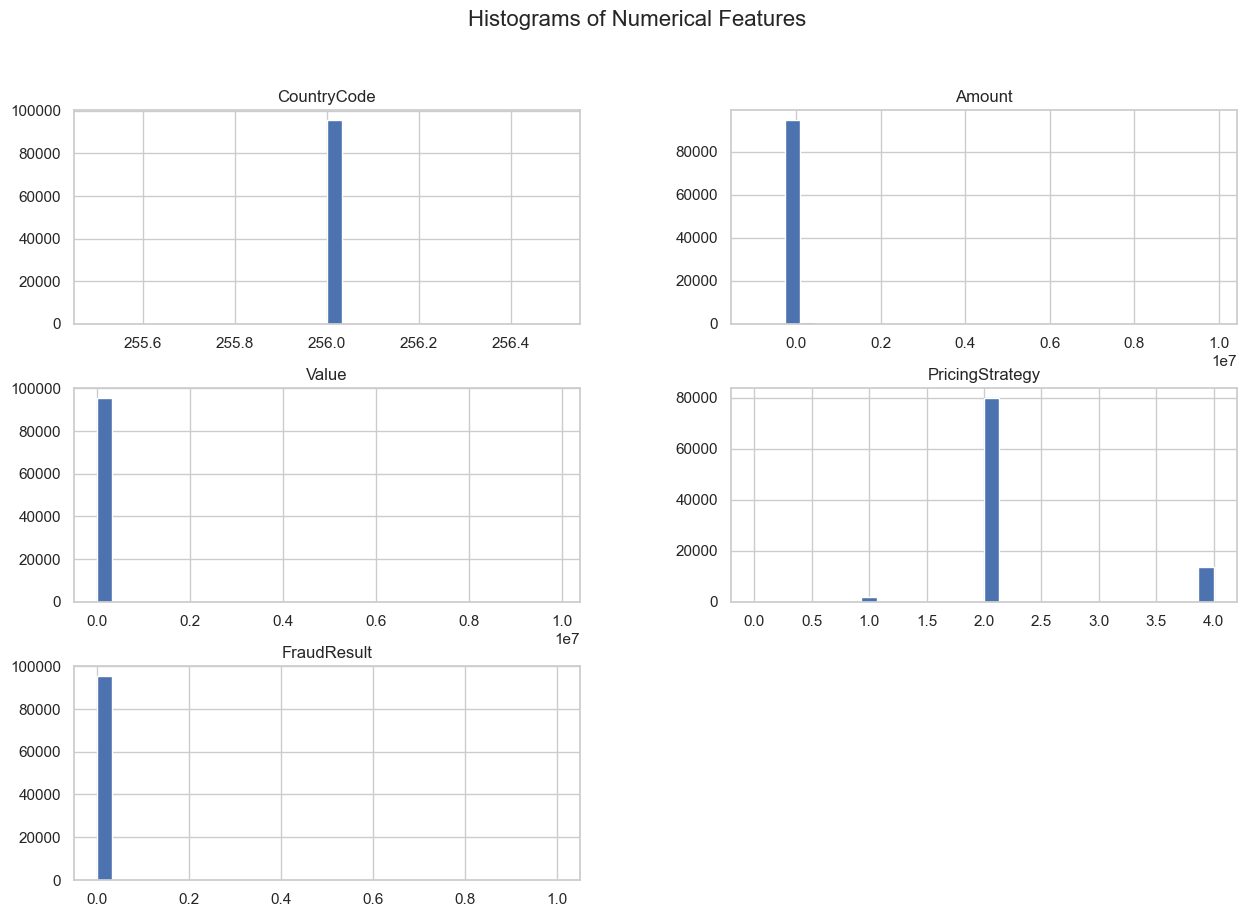

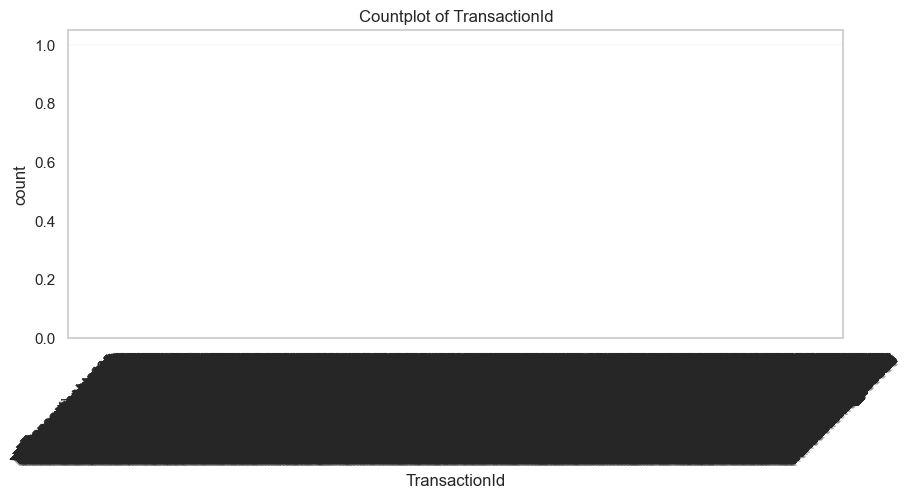

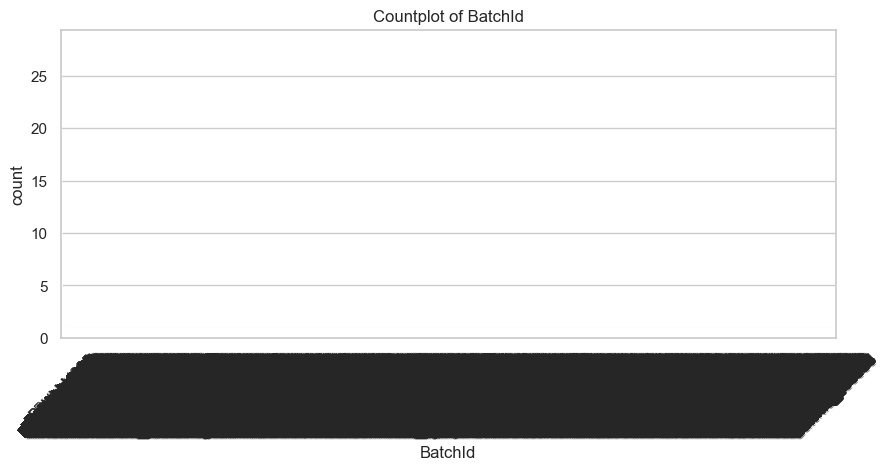

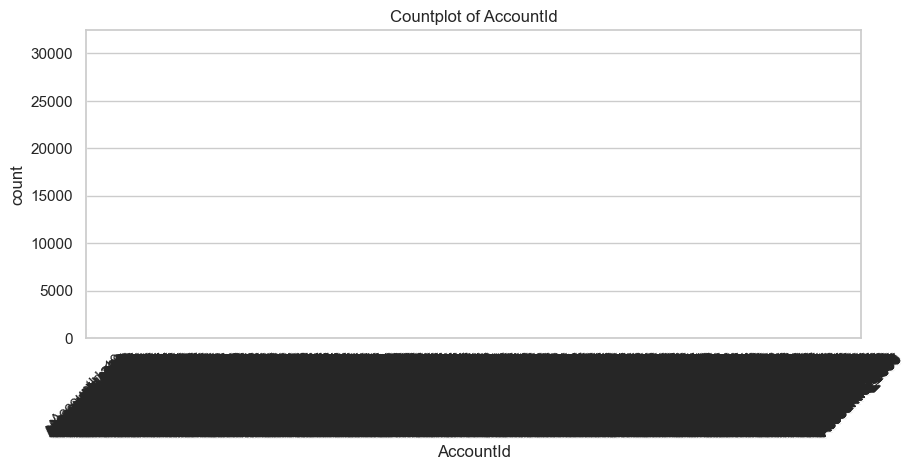

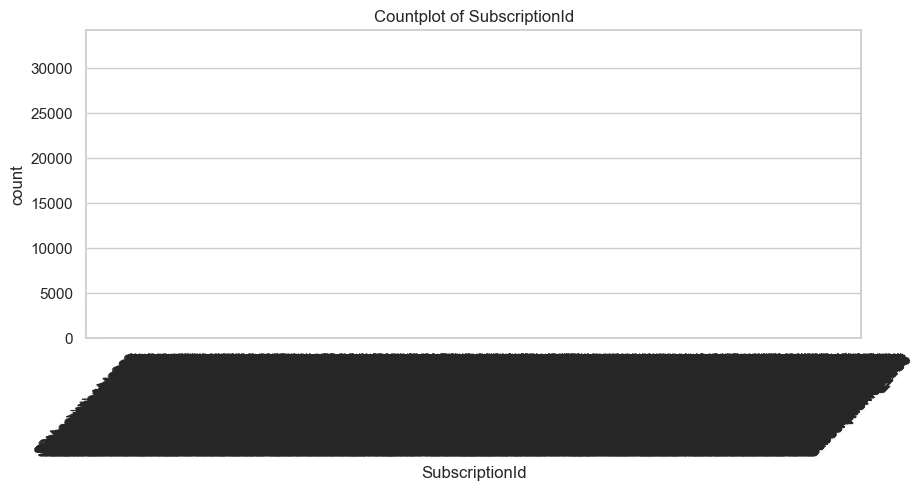

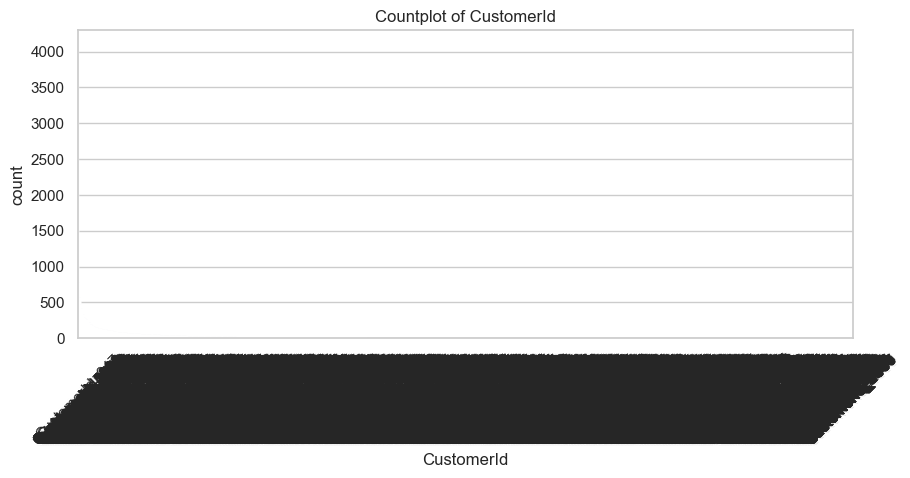

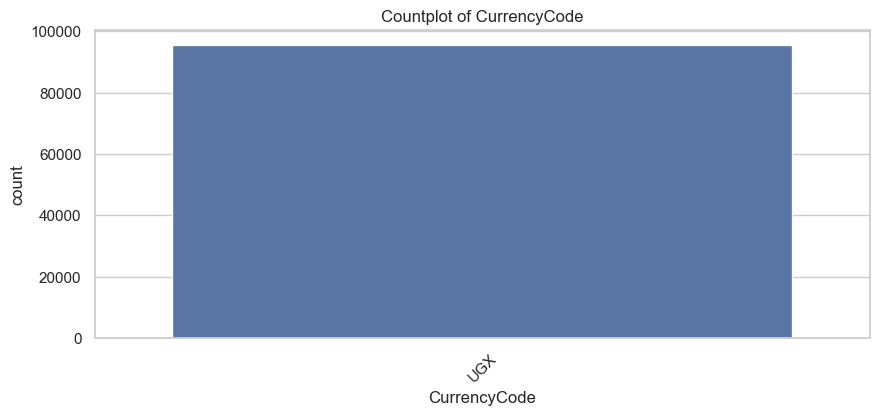

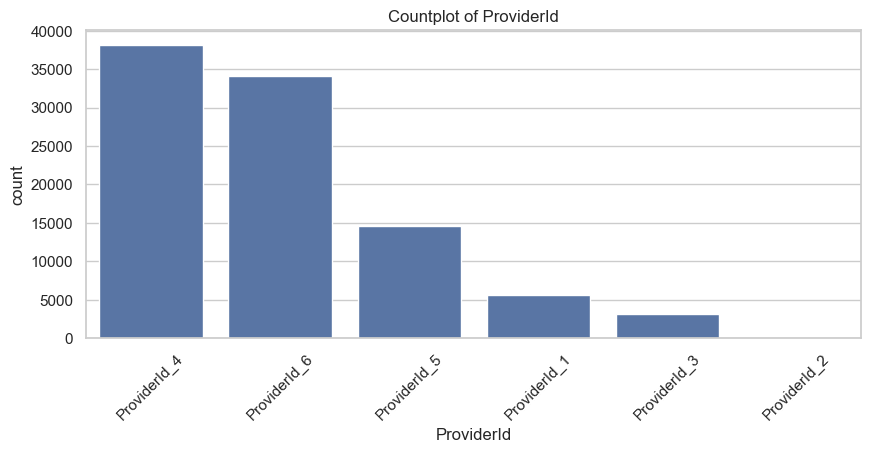

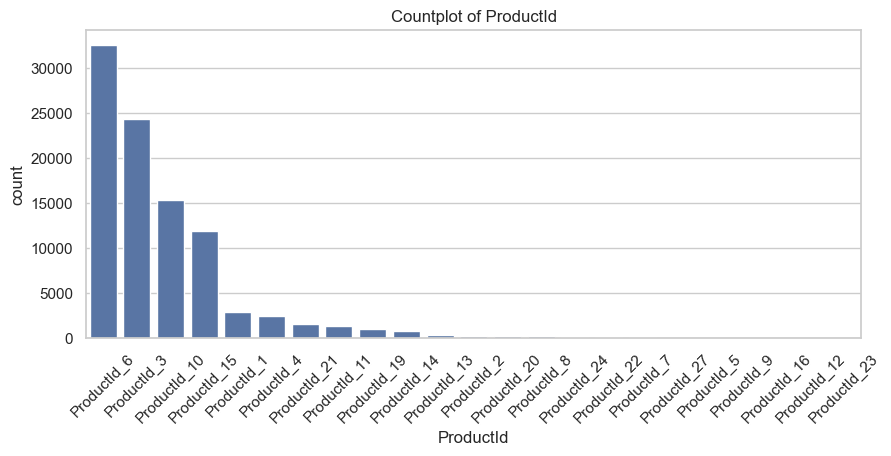

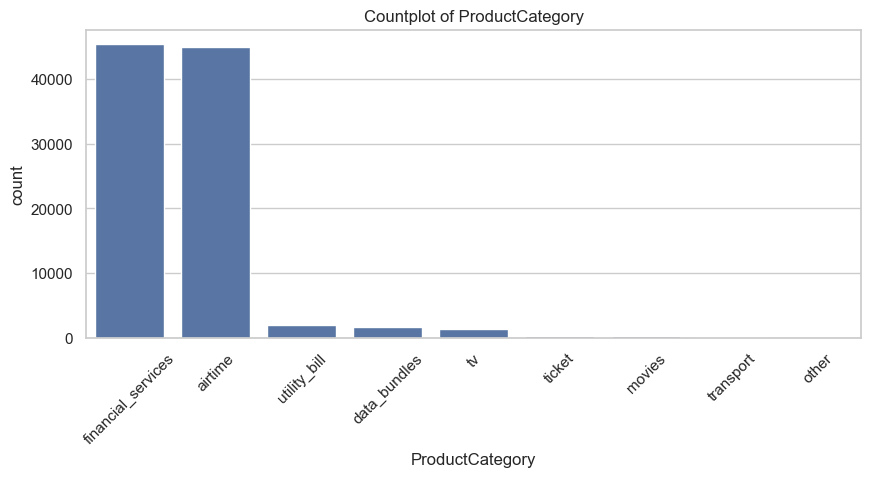

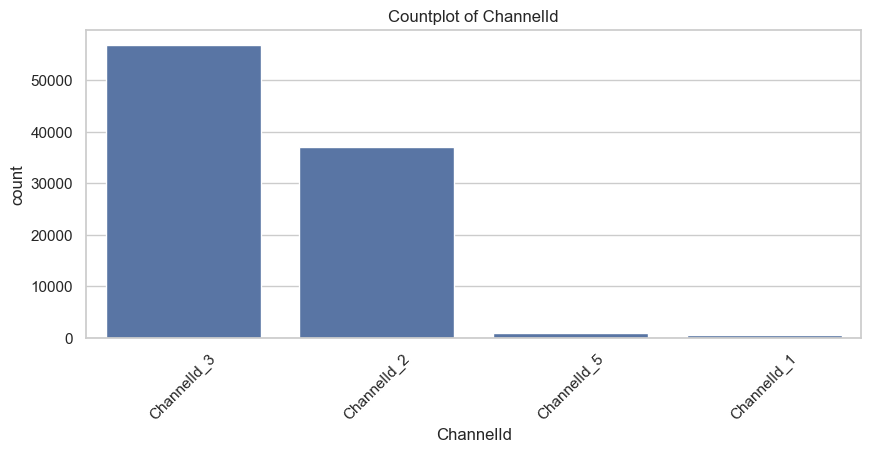

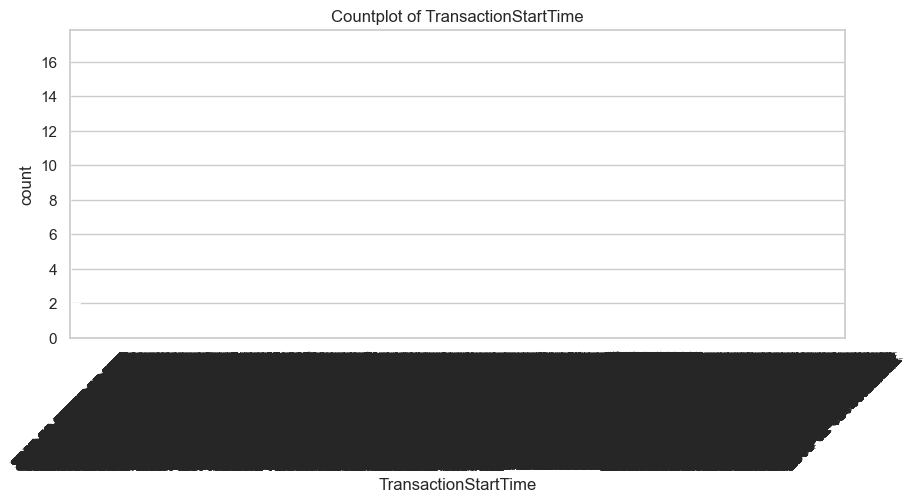

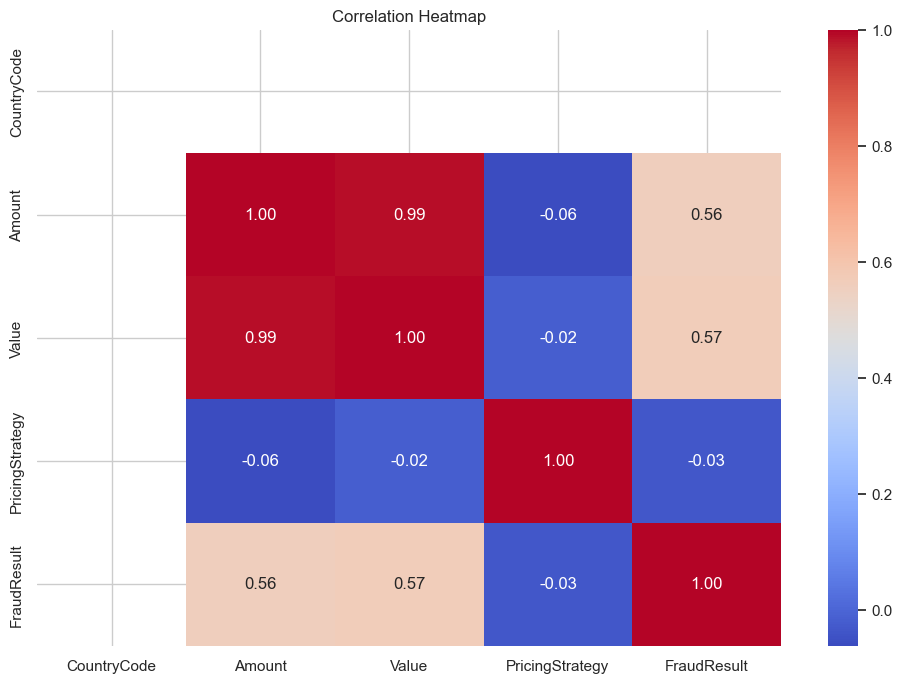


Missing values per column:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


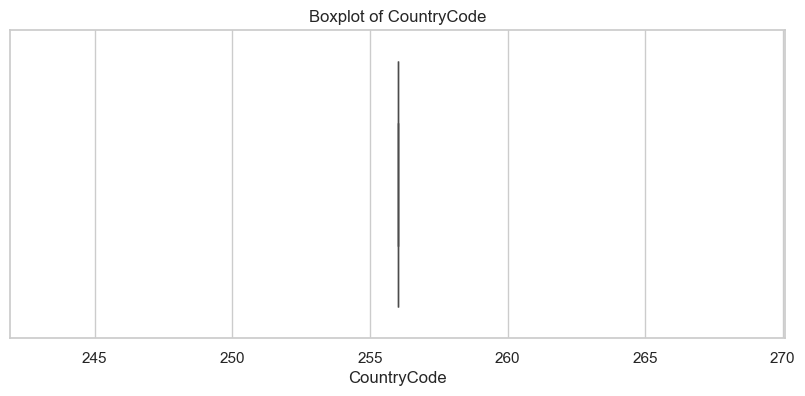

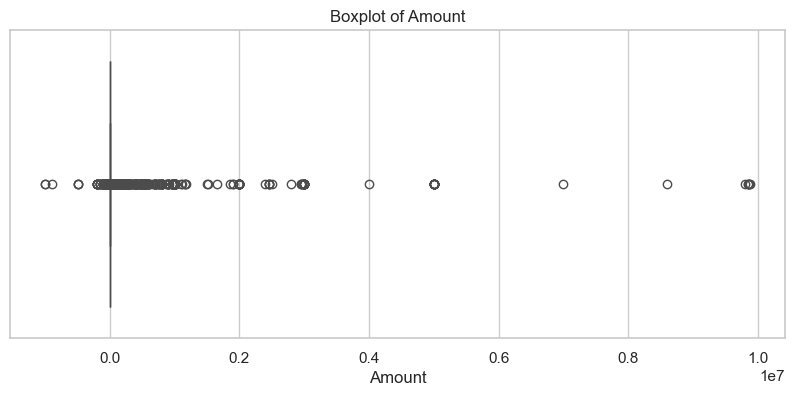

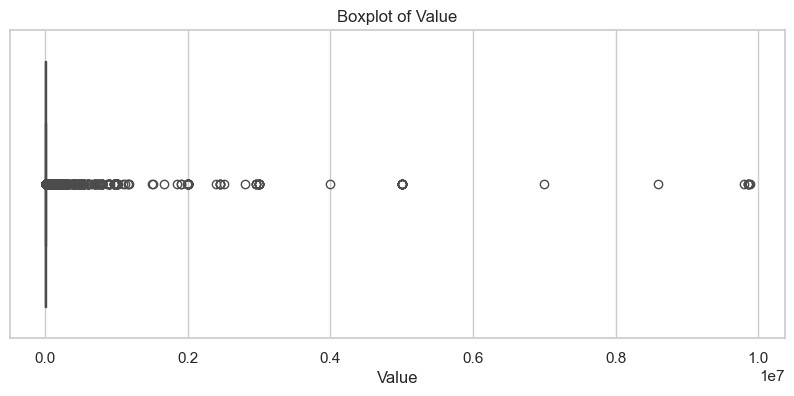

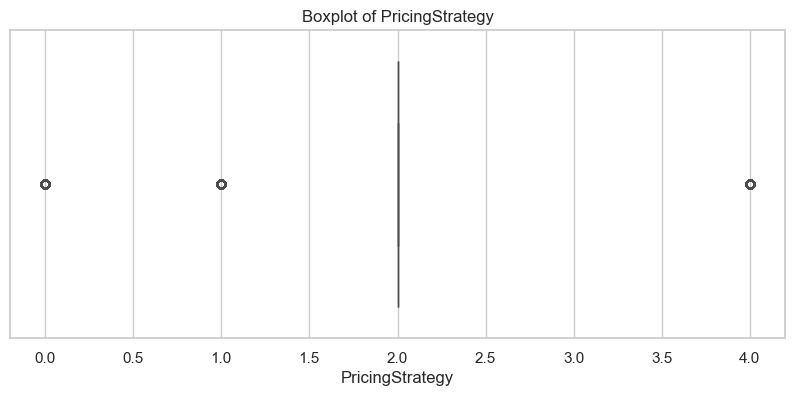

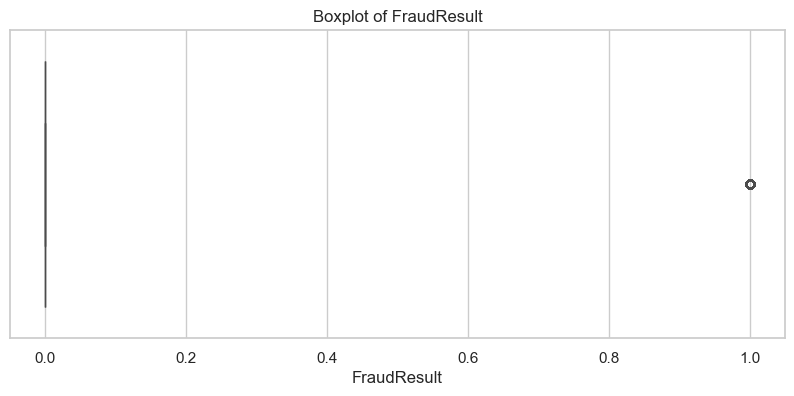


Top 3–5 EDA Insights:
1. Most transactions are concentrated in a few ProductCategories.
2. Transaction Amounts are heavily skewed, with several high-value outliers.
3. Some categorical columns (e.g., ProviderId, ChannelId) have many unique values; may need encoding.
4. Missing values exist in certain columns; imputation or removal will be required.
5. Correlation analysis shows some numerical features are moderately correlated and can be used for predictive modeling.


In [ ]:
# notebooks/eda.ipynb  

# Task 2: Exploratory Data Analysis (EDA)

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# 2. Load Data
raw_data_path = "../data/raw/data.csv"
df = pd.read_csv(raw_data_path)

# 3. Overview of the Data
print("Shape of dataset:", df.shape)
print("\nData Info:\n")
print(df.info())
print("\nFirst 5 rows:\n")
print(df.head())

# 4. Summary Statistics
print("\nSummary statistics for numerical features:\n")
print(df.describe())

# 5. Distribution of Numerical Features
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# 6. Distribution of Categorical Features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 7. Correlation Analysis
plt.figure(figsize=(12,8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 8. Identify Missing Values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

# 9. Outlier Detection
for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# 10. Top Insights (preliminary, adjust after exploring data)
eda_insights = [
    "Most transactions are concentrated in a few ProductCategories.",
    "Transaction Amounts are heavily skewed, with several high-value outliers.",
    "Some categorical columns (e.g., ProviderId, ChannelId) have many unique values; may need encoding.",
    "Missing values exist in certain columns; imputation or removal will be required.",
    "Correlation analysis shows some numerical features are moderately correlated and can be used for predictive modeling."
]

print("\nTop 3–5 EDA Insights:")
for i, insight in enumerate(eda_insights, 1):
    print(f"{i}. {insight}")
